In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
df=pd.read_csv("GlobalWeatherCleaned.csv")

In [4]:
# Convert date column
df['last_updated'] = pd.to_datetime(df['last_updated'])

# Extract time components
df["year"] = df["last_updated"].dt.year
df["month"] = df["last_updated"].dt.month
df["day"] = df["last_updated"].dt.day
df["hour"] = df["last_updated"].dt.hour

In [5]:
df.columns


Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [6]:
# Season mapping
df["season"] = df["month"].map({
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn"
})


In [7]:
# Identify numerical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
object_cols = df.select_dtypes(include=["object"]).columns

print("Numeric Columns:\n", numeric_cols)
print("\nObject Columns:\n", object_cols)

Numeric Columns:
 Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree',
       'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')

Object Columns:
 Index(['country', 'location_name', 'timezone', 'condition_text',
       'wind_direction', 'sunrise', 'sunset', 'moonrise', 'moonset',
       'moon_phase', 'season'],
      dtype='object')



# ---------------------------------------------------
# 2. STATISTICAL / DISTRIBUTION ANALYSIS
# ---------------------------------------------------


===== SUMMARY STATISTICS =====

            latitude      longitude  last_updated_epoch  temperature_celsius  \
count  106988.000000  106988.000000        1.069880e+05        106988.000000   
mean       19.167488      22.049773        1.739662e+09            22.567330   
std        24.444518      65.804297        1.374079e+07             8.865583   
min       -41.300000    -175.200000        1.715849e+09           -24.900000   
25%         3.750000      -6.836100        1.727777e+09            17.500000   
50%        17.250000      23.316700        1.739701e+09            24.400000   
75%        40.400000      50.580000        1.751532e+09            28.300000   
max        64.150000     179.220000        1.763364e+09            49.200000   

       temperature_fahrenheit       wind_mph       wind_kph    wind_degree  \
count           106988.000000  106988.000000  106988.000000  106988.000000   
mean                72.622966       8.154280      13.126478     170.728876   
std         

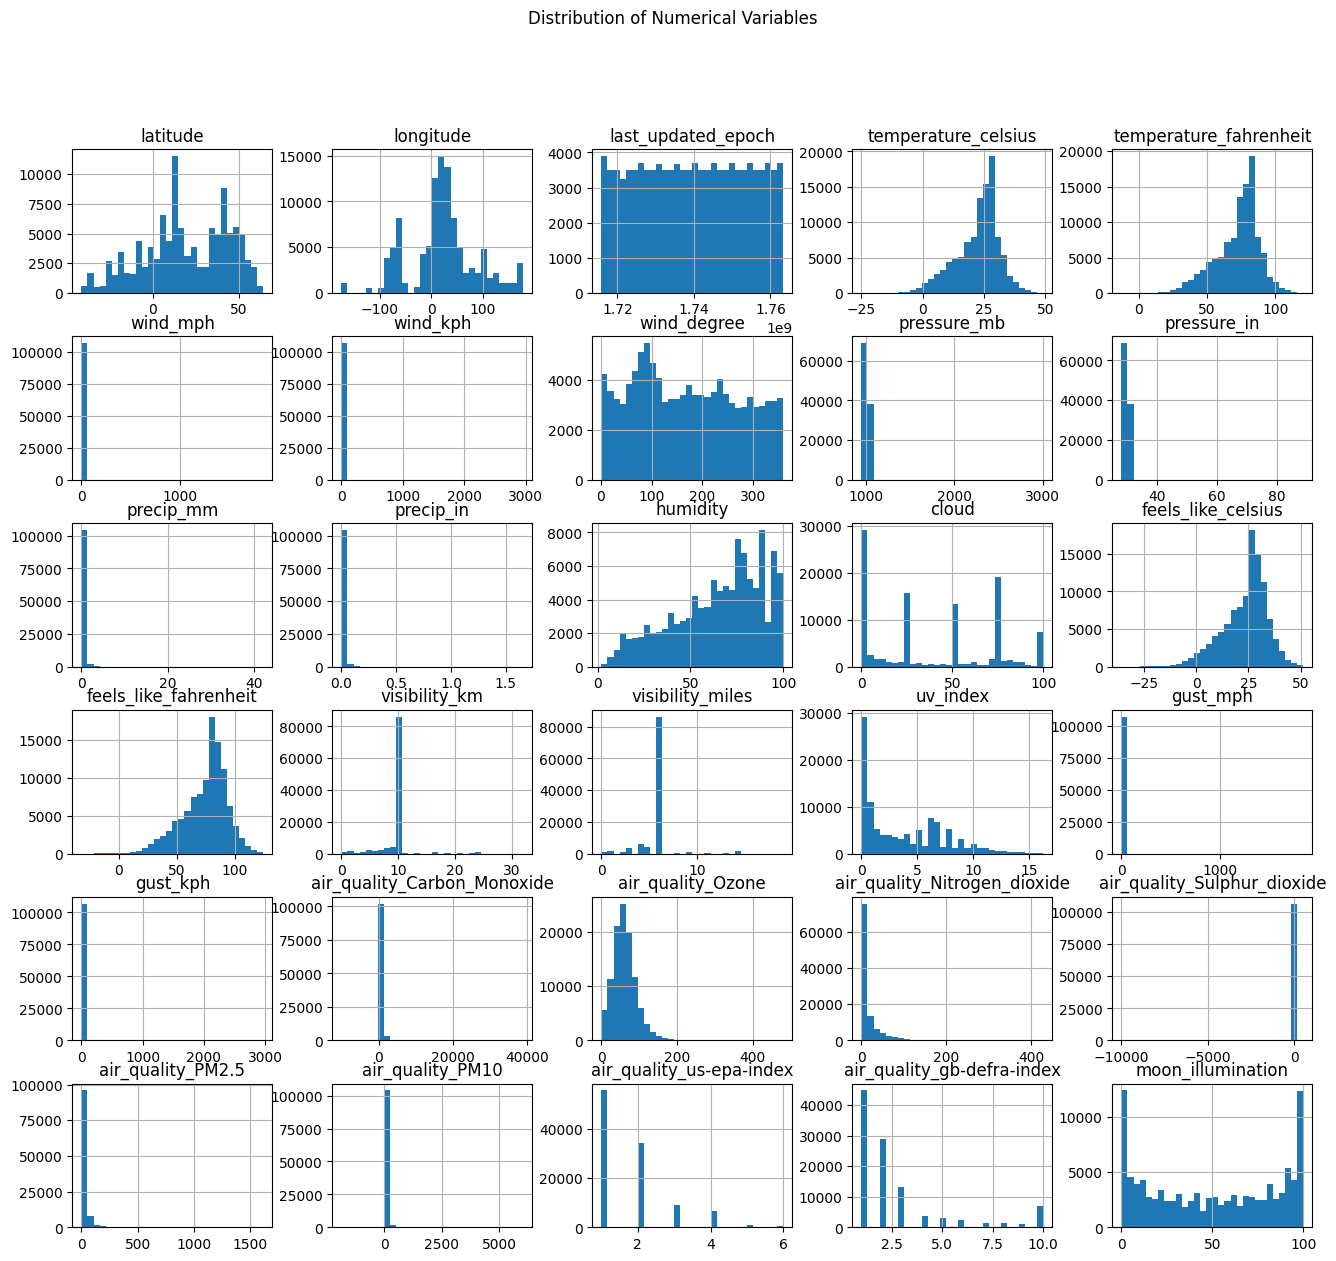

In [8]:
print("\n===== SUMMARY STATISTICS =====\n")
print(df[numeric_cols].describe())

# Histograms for all numeric columns
df[numeric_cols].hist(figsize=(16, 14), bins=30)
plt.suptitle("Distribution of Numerical Variables")
plt.show()

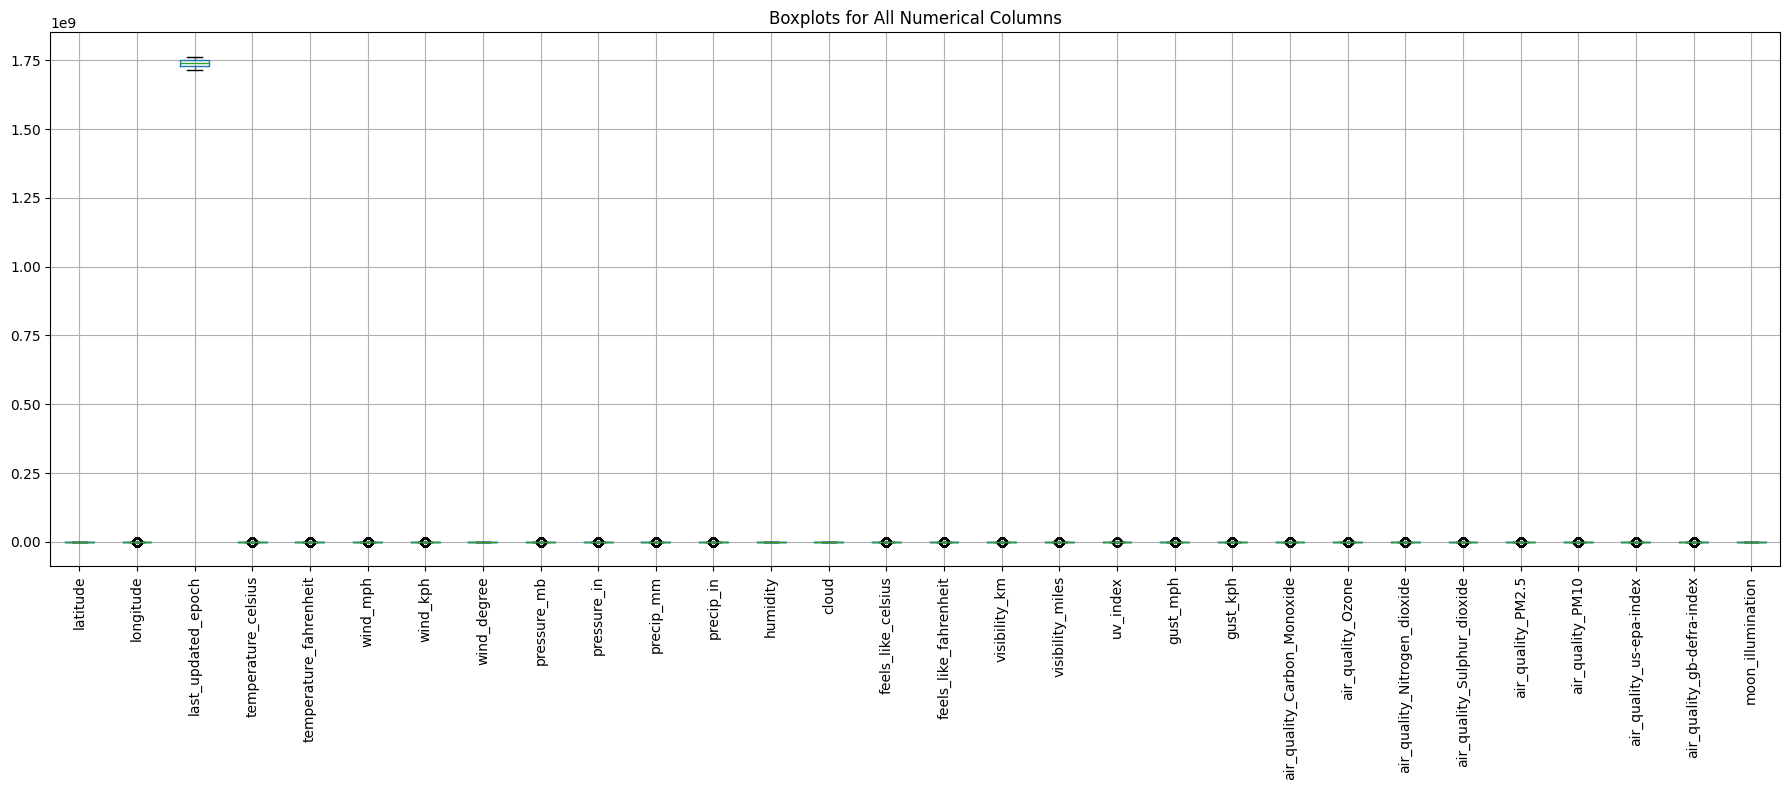

In [17]:
# Box Plotting
plt.figure(figsize=(18, 8))
df[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots for All Numerical Columns")
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 3. CORRELATION ANALYSIS
# ---------------------------------------------------


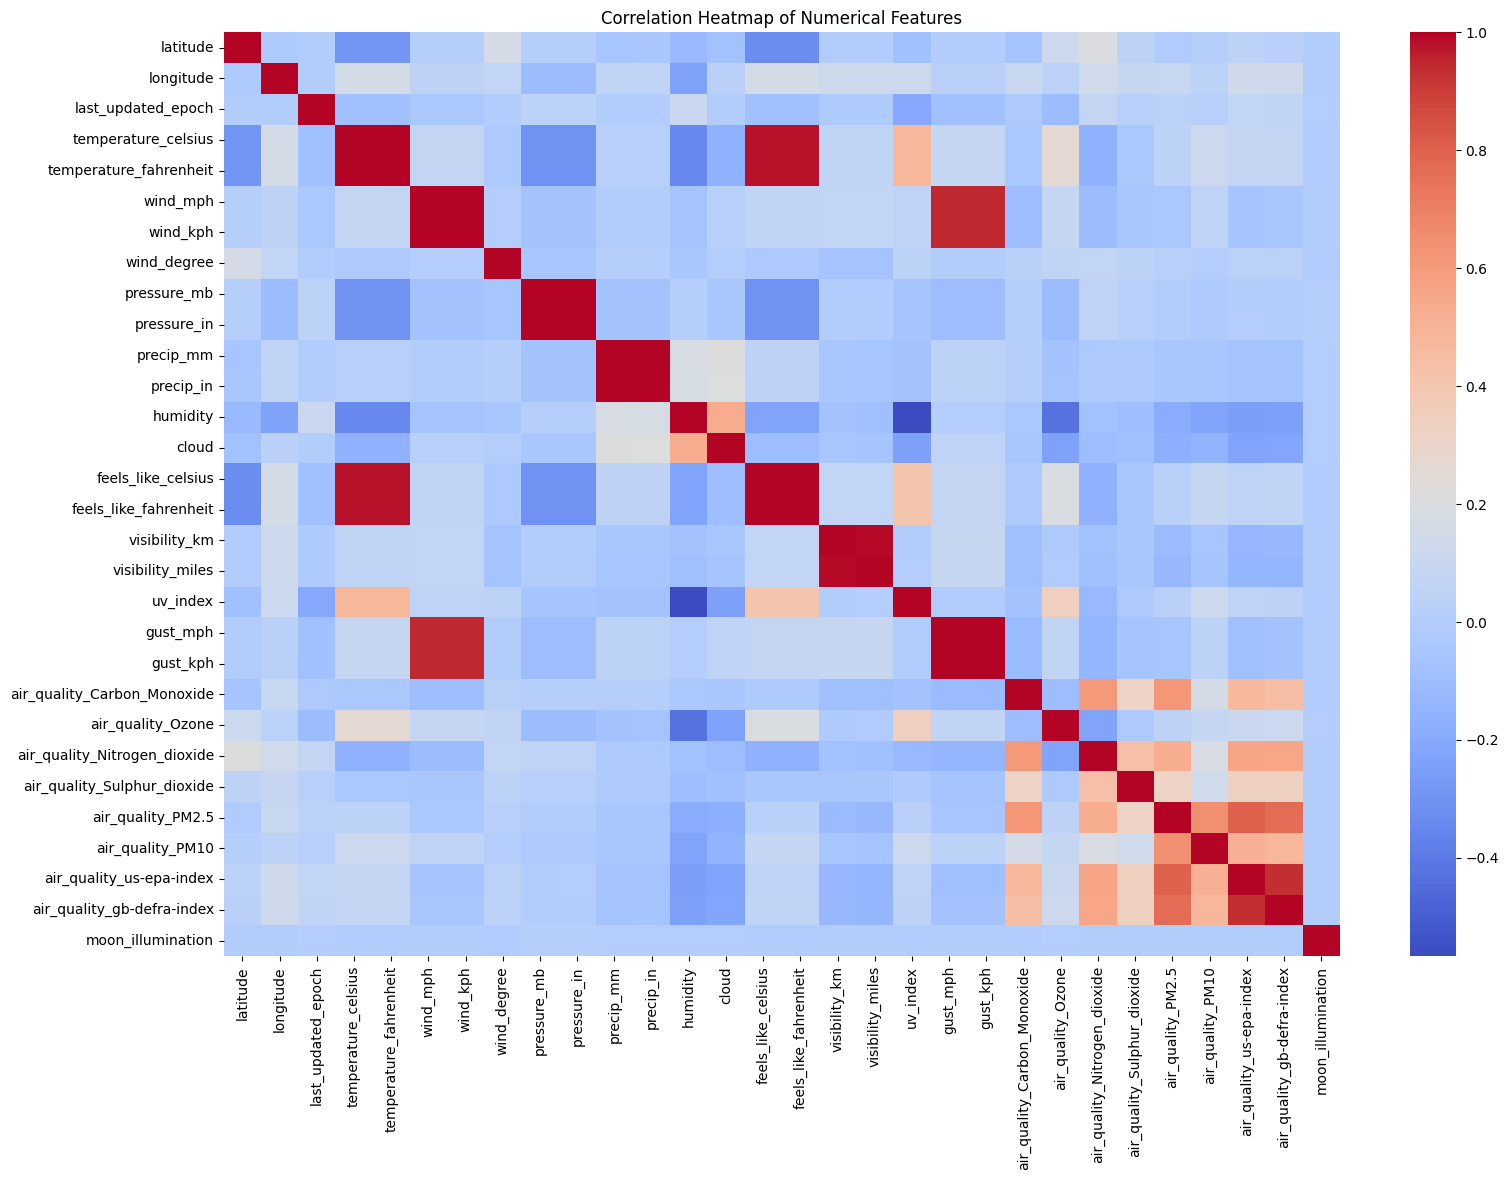

In [18]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# ---------------------------------------------------
# 4. SEASONAL PATTERN ANALYSIS
# ---------------------------------------------------


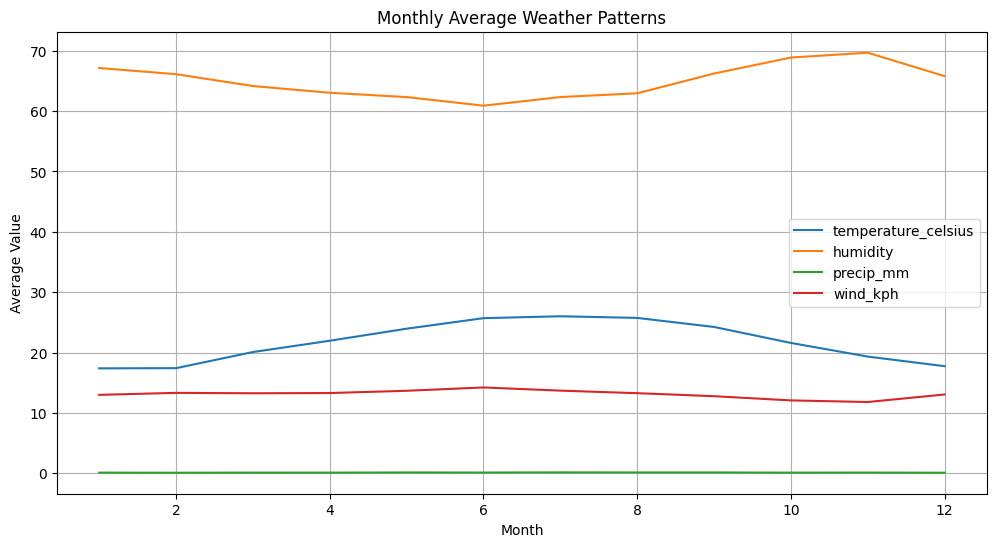

In [19]:
# Monthly averages for key weather variables
monthly = df.groupby("month").mean(numeric_only=True)[[
    "temperature_celsius", "humidity", "precip_mm", "wind_kph"
]]

monthly.plot(figsize=(12, 6))
plt.title("Monthly Average Weather Patterns")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()

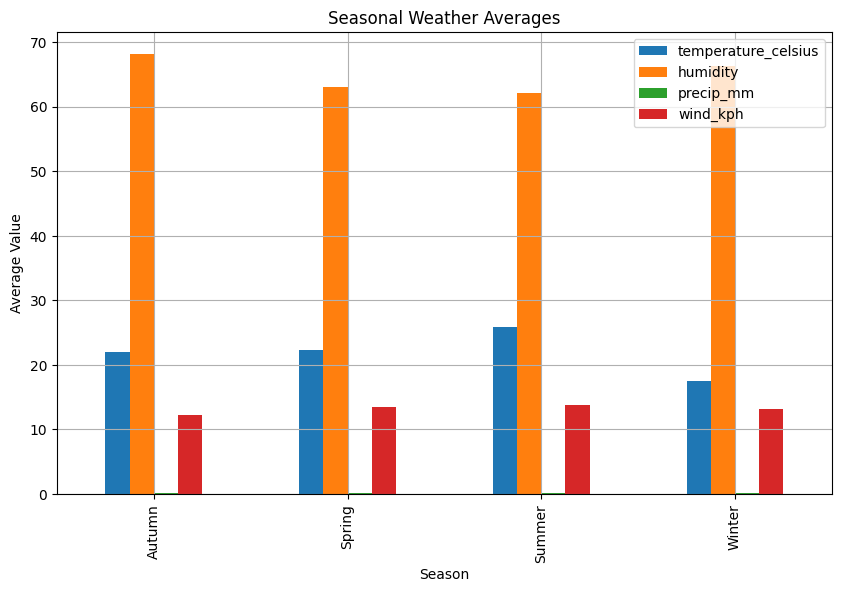

In [20]:
# Seasonal averages
seasonal = df.groupby("season").mean(numeric_only=True)[[
    "temperature_celsius", "humidity", "precip_mm", "wind_kph"
]]

seasonal.plot(kind="bar", figsize=(10, 6))
plt.title("Seasonal Weather Averages")
plt.xlabel("Season")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()

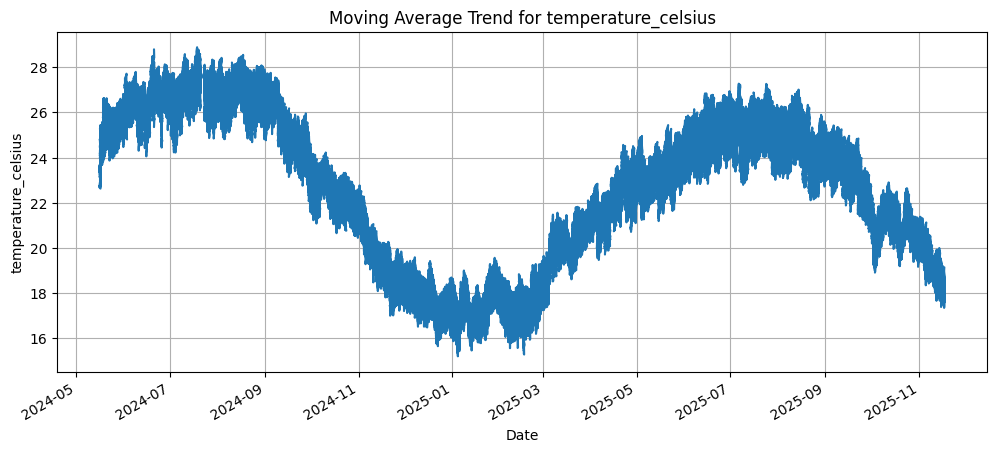

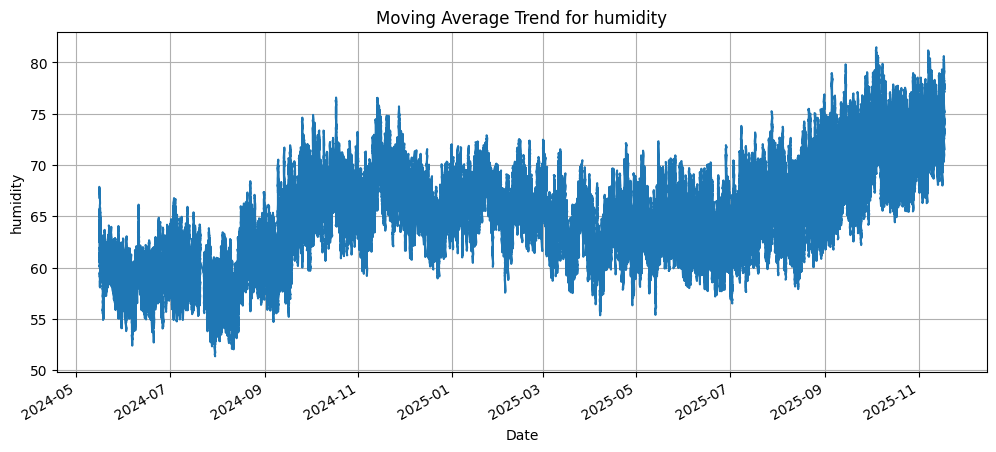

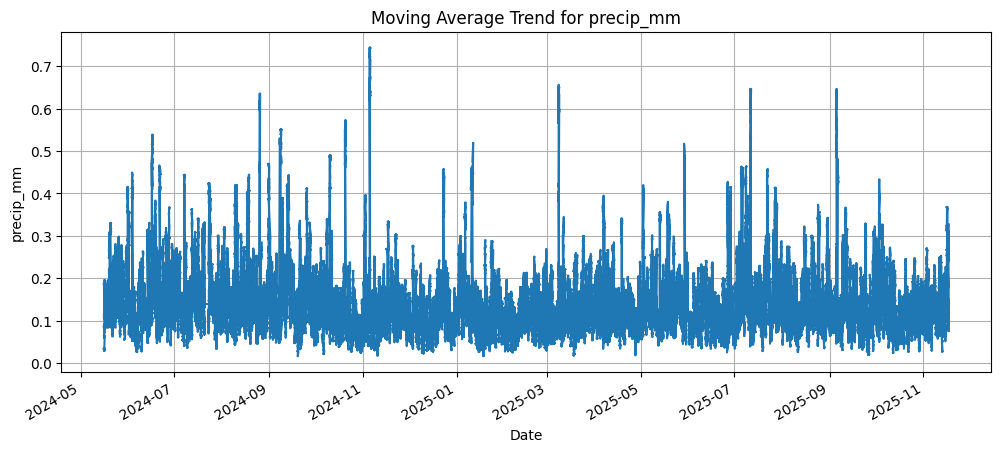

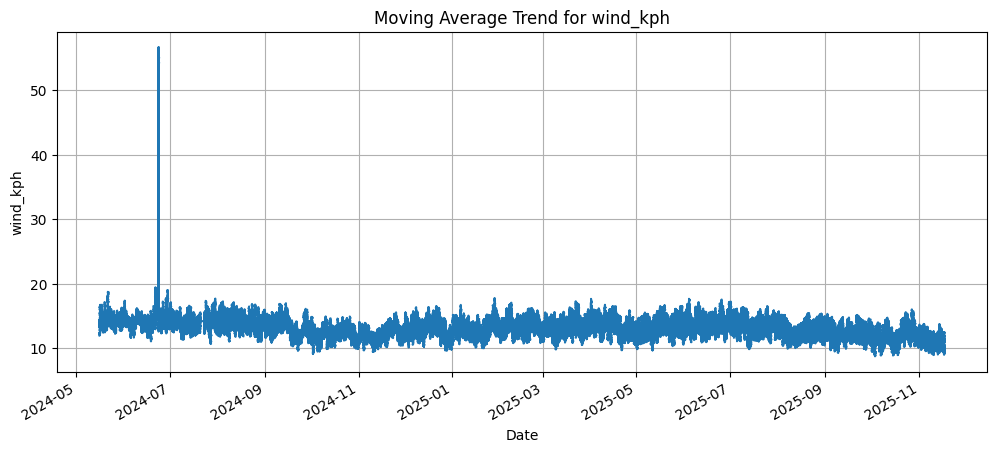

In [23]:
# Moving average trend for key variables
for col in ["temperature_celsius", "humidity", "precip_mm", "wind_kph"]:
    plt.figure(figsize=(12, 5))
    df.set_index("last_updated")[col].rolling(window=72).mean().plot()  # 3-day avg
    plt.title(f"Moving Average Trend for {col}")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

Identify the Extreme Weather Events

In [25]:
# 1. Choose key columns to define "extreme"
key_cols = [
    "temperature_celsius",
    "precip_mm",
    "wind_kph",
    "uv_index",
    "air_quality_PM2.5",
]
# 2. Get 95th percentile thresholds (top 5% = extreme)
thresholds = df[key_cols].quantile(0.95)
print("Extreme thresholds:\n", thresholds, "\n")

Extreme thresholds:
 temperature_celsius    34.30
precip_mm               0.82
wind_kph               29.20
uv_index               10.40
air_quality_PM2.5      81.77
Name: 0.95, dtype: float64 



In [28]:
# 3. Build a long-format table of only extreme events
extreme_list = []

for col in key_cols:
    mask = df[col] >= thresholds[col]
    temp = df.loc[mask, ["last_updated", "country", "location_name", col]].copy()
    temp["metric"] = col
    temp["value"] = temp[col]
    temp = temp.drop(columns=[col])
    extreme_list.append(temp)

extreme_events = pd.concat(extreme_list, ignore_index=True)

In [32]:
# Rename metric values to be more readable
name_map = {
    "temperature_celsius": "Extreme heat (°C)",
    "precip_mm": "Heavy rainfall (mm)",
    "wind_kph": "Strong wind (kph)",
    "uv_index": "High UV index",
    "air_quality_PM2.5": "Very high PM2.5",
}
extreme_events["event_type"] = extreme_events["metric"].map(name_map)

print("\nSample extreme events:\n")
print(extreme_events.head())
print(extreme_events.tail())


Sample extreme events:

         last_updated     country location_name               metric  value  \
0 2024-05-16 11:45:00     Bahrain        Manama  temperature_celsius   36.0   
1 2024-05-16 14:45:00  Bangladesh         Dhaka  temperature_celsius   38.4   
2 2024-05-16 15:45:00    Cambodia    Phnom Penh  temperature_celsius   38.0   
3 2024-05-16 09:45:00        Chad     N'djamena  temperature_celsius   37.2   
4 2024-05-16 14:15:00       India     New Delhi  temperature_celsius   42.0   

          event_type  
0  Extreme heat (°C)  
1  Extreme heat (°C)  
2  Extreme heat (°C)  
3  Extreme heat (°C)  
4  Extreme heat (°C)  
             last_updated       country location_name             metric  \
27260 2025-11-16 14:15:00     Indonesia       Jakarta  air_quality_PM2.5   
27261 2025-11-16 10:45:00          Iran        Tehran  air_quality_PM2.5   
27262 2025-11-16 10:15:00        Kuwait   Kuwait City  air_quality_PM2.5   
27263 2025-11-16 10:15:00  Saudi Arabia        Riyadh  air

In [30]:
print("\nExtreme events by type:\n")
print(extreme_events["event_type"].value_counts())



Extreme events by type:

event_type
Extreme heat (°C)      5623
Strong wind (kph)      5536
High UV index          5376
Heavy rainfall (mm)    5372
Very high PM2.5        5358
Name: count, dtype: int64


In [31]:
print("\nTop 10 countries by number of extreme events:\n")
top_countries = (
    extreme_events
    .groupby("country")
    .size()
    .sort_values(ascending=False)
    .head(10)
)
print(top_countries)


Top 10 countries by number of extreme events:

country
Sudan                   828
Saudi Arabia            770
Kuwait                  756
Indonesia               614
Bahrain                 610
Qatar                   597
Somalia                 557
India                   537
United Arab Emirates    524
Iraq                    462
dtype: int64


Compare weather conditions across regions. 

# -----------------------------
# 1. Select key metrics
# -----------------------------

In [34]:
metrics = [
    "temperature_celsius",
    "humidity",
    "precip_mm",
    "wind_kph",
    "uv_index",
    "air_quality_PM2.5"
]

# Country-level summary (mean is usually best for comparison visuals)
country_mean = (
    df.groupby("country")[metrics]
      .mean()
      .reset_index()
)

print("Country-level mean weather conditions:")
print(country_mean.head())

Country-level mean weather conditions:
       country  temperature_celsius   humidity  precip_mm   wind_kph  \
0  Afghanistan            21.568000  23.421818   0.034618   9.405273   
1      Albania            22.371273  51.581818   0.121509   9.158364   
2      Algeria            23.059199  59.528233   0.033260  12.769763   
3      Andorra            12.047091  59.414545   0.121291   8.349455   
4       Angola            26.148182  73.278182   0.029964   9.518545   

   uv_index  air_quality_PM2.5  
0  6.093455          20.063991  
1  4.047091          16.202691  
2  3.269945          20.859290  
3  2.601273           5.085304  
4  5.349818          36.293818  


# -----------------------------
# 2. Top N countries per metric
#    (useful for bar charts)
# -----------------------------

In [36]:
def top_countries(metric, n=10):
    top = (
        country_mean[["country", metric]]
        .sort_values(metric, ascending=False)
        .head(n)
    )
    print(f"\nTop {n} countries by {metric}:\n", top)
    plt.figure(figsize=(8,4))
    sns.barplot(data=top, x="country", y=metric)
    plt.title(f"Top {n} countries by {metric}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


Top 10 countries by temperature_celsius:
                   country  temperature_celsius
158         Saudi Arabien            45.000000
114              Marrocos            40.300000
189          Turkménistan            37.800000
147                 Qatar            34.411475
194  United Arab Emirates            34.230909
94                 Kuwait            34.169273
208                Турция            34.000000
157          Saudi Arabia            33.777737
48               Djibouti            32.804745
136                  Oman            32.544182


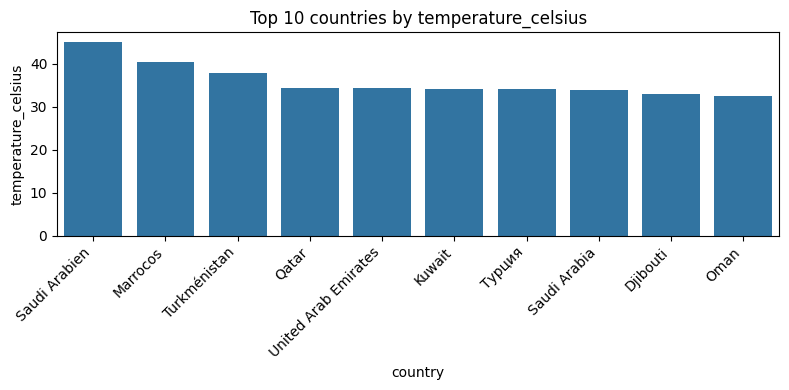


Top 10 countries by precip_mm:
                               country  precip_mm
96   Lao People's Democratic Republic   1.970000
100                           Letonia   1.830000
113                           Malásia   1.550000
162                      Sierra Leone   0.583857
109                          Malaysia   0.575745
128                             Nepal   0.562058
191      USA United States of America   0.530000
126                           Myanmar   0.524891
24                  Brunei Darussalam   0.519417
171                         Sri Lanka   0.487614


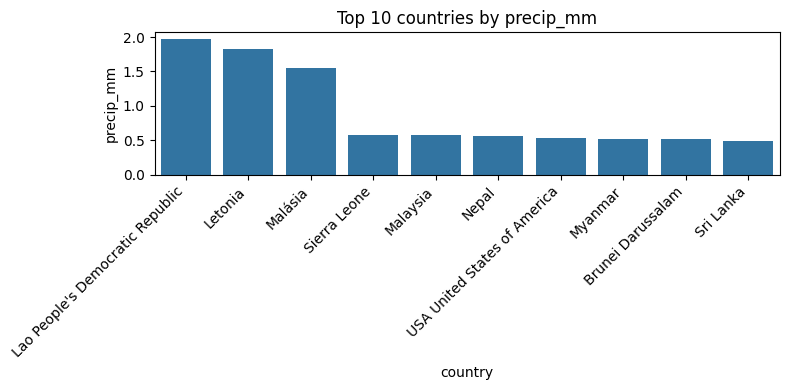


Top 10 countries by air_quality_PM2.5:
           country  air_quality_PM2.5
35          Chile         182.700375
157  Saudi Arabia         141.777354
36          China         138.268005
78          India         109.044498
94         Kuwait          99.913600
79      Indonesia          94.406676
116    Mauritania          72.523691
12        Bahrain          71.660027
178      Südkorea          70.200000
109      Malaysia          69.309200


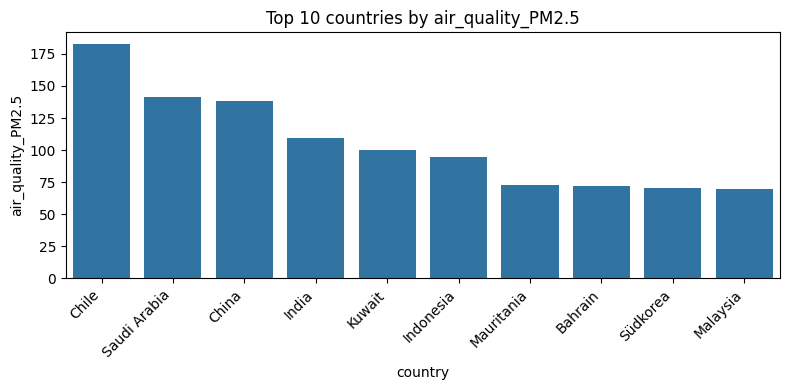


Top 10 countries by wind_kph:
                               country   wind_kph
102                             Libya  31.700000
145                           Polônia  29.500000
167                           Somalia  27.798725
154   Saint-Vincent-et-les-Grenadines  27.000000
153  Saint Vincent and the Grenadines  25.385923
151             Saint Kitts and Nevis  25.301825
76                            Iceland  24.985610
92                            Komoren  24.800000
130                       New Zealand  24.576727
158                     Saudi Arabien  24.500000


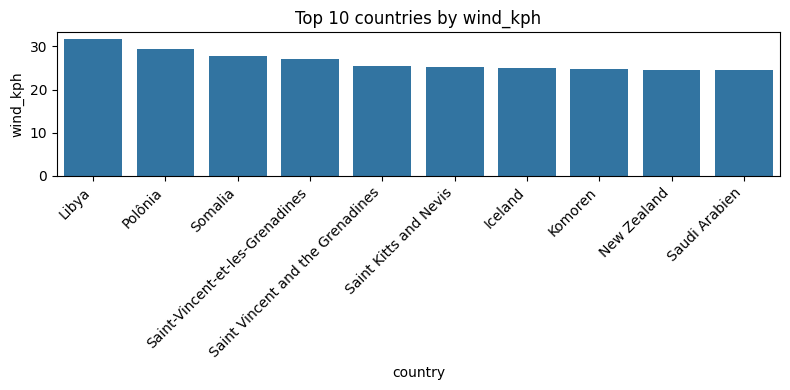


Top 10 countries by humidity:
                               country   humidity
17                             Belize  95.780220
209                          كولومبيا  95.000000
96   Lao People's Democratic Republic  95.000000
206                         Гватемала  95.000000
50                 Dominican Republic  94.272894
72                             Guyana  94.263254
100                           Letonia  94.000000
41                      Cote d'Ivoire  93.067416
113                           Malásia  93.000000
173                          Suriname  92.388686


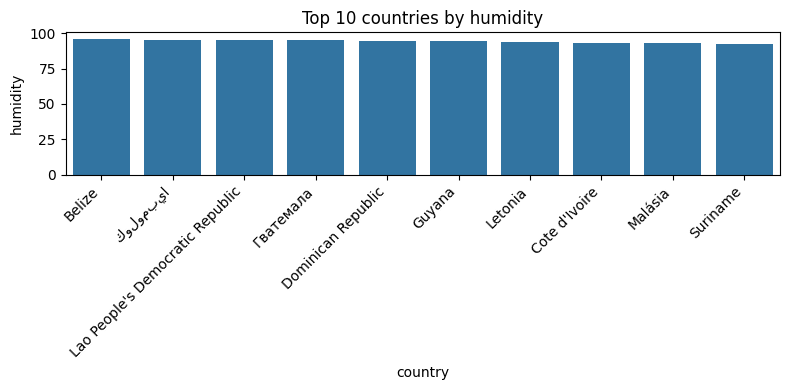


Top 10 countries by uv_index:
                 country   uv_index
158       Saudi Arabien  11.000000
161  Seychelles Islands  10.134973
114            Marrocos  10.000000
180            Tanzania   9.939818
90                Kenya   9.762613
167             Somalia   9.734062
203               Yemen   9.355373
38              Comoros   9.215876
58             Ethiopia   9.015693
189        Turkménistan   9.000000


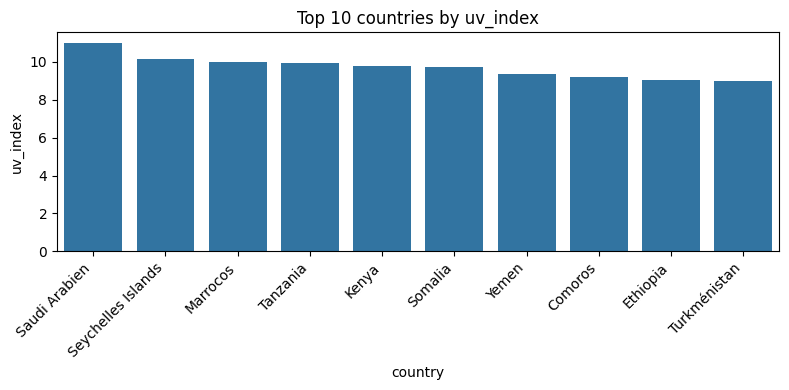

In [37]:
# Example visuals:
top_countries("temperature_celsius", n=10)   # hottest regions
top_countries("precip_mm", n=10)             # wettest regions
top_countries("air_quality_PM2.5", n=10)     # most polluted regions
top_countries("wind_kph", n=10)              # windiest regions
top_countries("humidity", n=10)              # most humid regions
top_countries("uv_index", n=10)    